In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
path_s = dict()
path_s['main'] = 'D:\\Onedrive\\Documents\\GAMSStudio'
path_s['1.5a'] = '\\or_report_1.5_model_A_multinode_trivial'
path_s['1.5b'] = '\\or_report_1.5_model_B_multinode_trivial'
path_s['1.6a'] = '\\or_report_1.6_model_A_multinode'
path_s['1.6b'] = '\\or_report_1.6_model_B_multinode'
path_s['5e'] = '\\5nodes'
path_s['6f'] = '\\6nodes'
path_s['7g'] = '\\7nodes'
path_s['8h'] = '\\8nodes'
path_s['9i'] = '\\9nodes'

path_s2 = dict()
path_s2['1.5a'] = '\\or_report.1.5_mA_'
path_s2['1.5b'] = '\\or_report.1.5_mB_'
path_s2['1.6a'] = '\\or_report.1.6_mA_'
path_s2['1.6b'] = '\\or_report.1.6_mB_'

In [87]:
def makingpath(folder = None, nodes = None):
    if folder == None or nodes == None:
        raise ValueError(
            "the 'folder' or 'nodes' is not given," + 
            " 'path_s' has what you should entry", path_s)
    path_0 = (
        path_s['main'] + path_s[folder] + path_s[nodes] +
        path_s2[folder] + nodes + '_out_')
    path_cost = path_0 + 'cost.csv'
    path_remain = path_0 + 'remain.csv'
    path_remainrate = path_0 + 'remainrate.csv'
    path_isfeasible = path_0 + 'isfeasible.csv'
    return path_cost, path_remain, path_remainrate, path_isfeasible
    

In [88]:
makingpath('1.5a', '6f')

('D:\\Onedrive\\Documents\\GAMSStudio\\or_report_1.5_model_A_multinode_trivial\\6nodes\\or_report.1.5_mA_6f_out_cost.csv',
 'D:\\Onedrive\\Documents\\GAMSStudio\\or_report_1.5_model_A_multinode_trivial\\6nodes\\or_report.1.5_mA_6f_out_remain.csv',
 'D:\\Onedrive\\Documents\\GAMSStudio\\or_report_1.5_model_A_multinode_trivial\\6nodes\\or_report.1.5_mA_6f_out_remainrate.csv',
 'D:\\Onedrive\\Documents\\GAMSStudio\\or_report_1.5_model_A_multinode_trivial\\6nodes\\or_report.1.5_mA_6f_out_isfeasible.csv')

In [89]:
def dataload(folder = None, nodes = None):
    if folder == None or nodes == None:
        raise ValueError(
            "the 'folder' or 'nodes' is not given," + 
            " 'path_s' has what you should entry", path_s)
    data_path = makingpath(folder, nodes)
    data_cost = pd.read_csv(data_path[0])
    data_remain = pd.read_csv(data_path[1])
    data_remainrate = pd.read_csv(data_path[2])
    data_isfeasible = pd.read_csv(data_path[3])
    return data_cost, data_remain, data_remainrate, data_isfeasible

In [90]:
dataload('1.5a', '5e')[1]

,remain(iter)
1,0.95
2,1.90
3,2.85
4,3.80
5,4.75
...,...
996,-196.00
997,-197.00
998,-198.00
999,-199.00


In [91]:
def framegenerate(folder = None, nodes = None):
    if folder == None or nodes == None:
        raise ValueError(
            "the 'folder' or 'nodes' is not given," + 
            " 'path_s' has what you should entry", path_s)
    frame_set = dataload(folder, nodes)
    frame_target = pd.DataFrame()
    frame_target['cost'] = frame_set[0]['cost(iter)']
    frame_target['remain'] = frame_set[1]['remain(iter)']
    frame_target['remainrate'] = frame_set[2]['remainrate(iter)']
    frame_target['isfeasible'] = frame_set[3]['isfeasible(iter)']
    return frame_target

In [92]:
framegenerate('1.5a', '5e')

,cost,remain,remainrate,isfeasible
1,0.05,0.95,0.950000,1
2,0.10,1.90,0.950000,1
3,0.15,2.85,0.950000,1
4,0.20,3.80,0.950000,1
5,0.25,4.75,0.950000,1
...,...,...,...,...
996,1192.00,-196.00,-0.196787,4
997,1194.00,-197.00,-0.197593,4
998,1196.00,-198.00,-0.198397,4
999,1198.00,-199.00,-0.199199,4


In [93]:
def fail_seperate(frame = None):
    if type(frame) != type(pd.DataFrame()):
        raise TypeError("this is only for dataframe of or_report")
    endpoint = 0
    for i in list(frame.index):
        isfeasible = frame.loc[i, ('isfeasible')]
        if frame.loc[i, ('isfeasible')] == 1:
            frame.loc[i, ('cost_fail')] = None
            frame.loc[i, ('remain_fail')] = None 
            frame.loc[i, ('remainrate_fail')] = None
        else :
            frame.loc[i, ('cost_fail')] = frame.loc[i, ('cost')]
            frame.loc[i, ('remain_fail')] = frame.loc[i, ('remain')]
            frame.loc[i, ('remainrate_fail')] = frame.loc[i, ('remainrate')]
            
            frame.loc[i, ('cost')] = None
            frame.loc[i, ('remain')] = None 
            frame.loc[i, ('remainrate')] = None
    
    for i in list(frame.index):
        if frame.loc[i, ('isfeasible')] == 4:
            endpoint = i - 1
            break
        
    return frame, endpoint

In [94]:
fail_seperate(framegenerate('1.5a', '5e'))[1]

400

In [95]:
fail_seperate(framegenerate('1.5a', '5e'))[0]

,cost,remain,remainrate,isfeasible,cost_fail,remain_fail,remainrate_fail
1,0.05,0.95,0.95,1,NaN,NaN,NaN
2,0.10,1.90,0.95,1,NaN,NaN,NaN
3,0.15,2.85,0.95,1,NaN,NaN,NaN
4,0.20,3.80,0.95,1,NaN,NaN,NaN
5,0.25,4.75,0.95,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,4,1192.0,-196.0,-0.196787
997,NaN,NaN,NaN,4,1194.0,-197.0,-0.197593
998,NaN,NaN,NaN,4,1196.0,-198.0,-0.198397
999,NaN,NaN,NaN,4,1198.0,-199.0,-0.199199


In [103]:
callframe = lambda folder, nodes: fail_seperate(framegenerate(folder, nodes))

In [104]:
mA = dict()
mB = dict()
mA['6f_trivial'] = callframe('1.5a', '6f')
mA['5e_trivial'] = callframe('1.5a', '5e')

In [106]:
mA['6f_trivial'][0]

,cost,remain,remainrate,isfeasible,cost_fail,remain_fail,remainrate_fail
1,0.05,0.95,0.95,1,NaN,NaN,NaN
2,0.10,1.90,0.95,1,NaN,NaN,NaN
3,0.15,2.85,0.95,1,NaN,NaN,NaN
4,0.20,3.80,0.95,1,NaN,NaN,NaN
5,0.25,4.75,0.95,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,4,992.0,4.0,0.004016
997,NaN,NaN,NaN,4,1191.0,-194.0,-0.194584
998,NaN,NaN,NaN,4,996.0,2.0,0.002004
999,NaN,NaN,NaN,4,1197.0,-198.0,-0.198198


In [107]:
mA['5e_trivial'][0]

,cost,remain,remainrate,isfeasible,cost_fail,remain_fail,remainrate_fail
1,0.05,0.95,0.95,1,NaN,NaN,NaN
2,0.10,1.90,0.95,1,NaN,NaN,NaN
3,0.15,2.85,0.95,1,NaN,NaN,NaN
4,0.20,3.80,0.95,1,NaN,NaN,NaN
5,0.25,4.75,0.95,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
996,NaN,NaN,NaN,4,1192.0,-196.0,-0.196787
997,NaN,NaN,NaN,4,1194.0,-197.0,-0.197593
998,NaN,NaN,NaN,4,1196.0,-198.0,-0.198397
999,NaN,NaN,NaN,4,1198.0,-199.0,-0.199199


In [108]:
mA['5e_trivial'][1]

400

In [109]:
type(mA['5e_trivial'])

tuple

In [113]:
def plot_single(frame = None, endpoint = 0, column = None, title = None):
    if type(frame) != type(pd.DataFrame()):
        raise TypeError("this is only for dataframe of or_report")
    column_fail = column + '_fail'
    
    pic = plt.figure(figsize = (10, 5))
    pic = plt.plot(frame[column])
    pic = plt.plot(frame[column_fail])
    pic = plt.vlines(endpoint, ymin = 0, ymax = frame.loc[endpoint, (column)])
    pic = plt.xlabel('quantity of currency', fontdict = {'fontsize':15})
    pic = plt.ylabel('remain', fontdict = {'fontsize': 15})
    pic = plt.fill_between(list(frame.index), frame[column], 0, alpha = 0.3)
    pic = plt.fill_between(list(frame.index), frame[column_fail], 0, alpha = 0.3)
    pic = plt.legend(('feasible', 'infeasible', 'max feasible',), fontsize = 12)
    pic = plt.title(title, fontdict = {'fontsize': 20})
    
    return pic



Text(0.5, 1.0, 'Model A in 6 nodes')

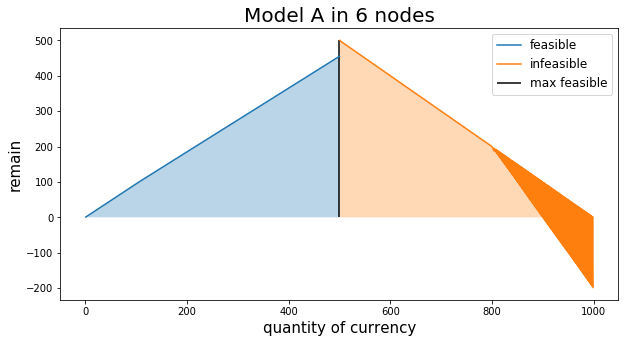

In [111]:
plot_single(mA['6f_trivial'][0], mA['6f_trivial'][1], 'remain', title = 'Model A in 6 nodes')

Text(0.5, 1.0, 'Model A in 6 nodes')

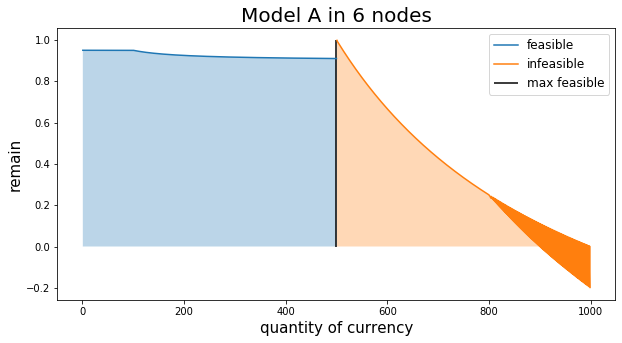

In [112]:
plot_single(
    mA['6f_trivial'][0], 
    mA['6f_trivial'][1], 
    'remainrate', title = 'Model A in 6 nodes')